# BAX Emittance Minimization (LCLS-II)
In this notebook, we hope to demonstrate Bayesian Algorithm Execution (BAX) in Xopt as a means of minimizing the emittance at LCLS-II. BAX is a generalization of Bayesian Optimization that seeks to acquire observations that provide our model with maximal information about our property of interest. In this example, our property of interest is the minimal emittance and its location in tuning-parameter-space. See https://arxiv.org/pdf/2209.04587.pdf for details.

In [1]:
# set up env for running on SLAC production servers
import os
os.environ['OMP_NUM_THREADS']=str(6)

In [2]:
run_dir = '/home/physics/ml_tuning/20240321_LCLS_II_Injector'

# Read pv info from YAML files

In [3]:
import sys
import yaml
sys.path.append("../../")
sys.path.append("../../../")

from common import get_pv_objects, save_reference_point, set_magnet_strengths, \
    measure_pvs

In [4]:
pv_bounds = yaml.safe_load(open("../../pv_bounds.yml"))
pv_objects = get_pv_objects("../../tracked_pvs.yml")

In [5]:
pv_bounds

{'QUAD:GUNB:212:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:212:2:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:2:BCTRL': [-0.005, 0.005],
 'QUAD:HTR:120:BCTRL': [-4.48, 1],
 'QUAD:HTR:140:BCTRL': [-4.4778, 4.4762],
 'QUAD:HTR:300:BCTRL': [-4.46035, 4.4692],
 'QUAD:HTR:320:BCTRL': [-4.46919, 4.4792],
 'SOLN:GUNB:212:BCTRL': [0.044, 0.044574],
 'SOLN:GUNB:823:BCTRL': [0.021, 0.0255]}

# load reference point
Also define a function to write the reference values to the pvs

In [6]:
reference = yaml.safe_load(open("../../reference.yml"))

def reset_pvs():
    set_magnet_strengths(reference, pv_objects, validate=False)

In [7]:
reference

{'QUAD:GUNB:212:1:BCTRL': 0.0023,
 'QUAD:GUNB:212:2:BCTRL': 0.0014125000000000001,
 'QUAD:GUNB:823:1:BCTRL': 0.003,
 'QUAD:GUNB:823:2:BCTRL': 0.0033875,
 'QUAD:HTR:120:BCTRL': -2.2331855578374693,
 'QUAD:HTR:140:BCTRL': 2.01213981773302,
 'QUAD:HTR:300:BCTRL': 1.1807187770838672,
 'QUAD:HTR:320:BCTRL': -2.0934402913247743,
 'SOLN:GUNB:212:BCTRL': 0.0442,
 'SOLN:GUNB:823:BCTRL': 0.025}

In [8]:
reset_pvs()

QUAD:GUNB:212:1:BCTRL 0.0023
QUAD:GUNB:212:2:BCTRL 0.0014125000000000001
QUAD:GUNB:823:1:BCTRL 0.003
QUAD:GUNB:823:2:BCTRL 0.0033875
QUAD:HTR:120:BCTRL -2.2331855578374693
QUAD:HTR:140:BCTRL 2.01213981773302
QUAD:HTR:300:BCTRL 1.1807187770838672
QUAD:HTR:320:BCTRL -2.0934402913247743
SOLN:GUNB:212:BCTRL 0.0442
SOLN:GUNB:823:BCTRL 0.025


In [9]:
from scripts.image import ImageDiagnostic, ROI
import yaml

fname = 'otr_diagnostic.yml' #run_dir + "OTRS_HTR_330_config.yml"

roi = ROI(
    ycenter=967,
    xcenter=878,
    xwidth=600,
    ywidth=600
)
    

image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
image_diagnostic.roi = roi
image_diagnostic.min_log_intensity = 5.0
image_diagnostic.save_image_location = run_dir
image_diagnostic.n_fitting_restarts = 2
image_diagnostic.visualize = False
print(image_diagnostic.yaml())


screen_name: OTRS:HTR:330
array_data_suffix: Image:ArrayData
array_n_cols_suffix: Image:ArraySize0_RBV
array_n_rows_suffix: Image:ArraySize1_RBV
resolution_suffix: RESOLUTION
resolution: 19.24
beam_shutter_pv: TPR:LGUN:TS01:0:TRG00_SYS2_TCTL
extra_pvs: []
background_file: null
save_image_location: /home/physics/ml_tuning/20240321_LCLS_II_Injector
roi: {xcenter: 878, ycenter: 967, xwidth: 600, ywidth: 600}
min_log_intensity: 5.0
bounding_box_half_width: 3.0
wait_time: 1.0
n_fitting_restarts: 2
visualize: false
return_statistics: false
threshold: 0.0
apply_bounding_box_constraint: true
testing: false



In [10]:
image_diagnostic.measure_background()

array([[0.4, 0. , 0.4, ..., 0. , 0.4, 0.2],
       [0.4, 0. , 0.6, ..., 0. , 0. , 0. ],
       [0.4, 0. , 0.2, ..., 0.2, 0. , 0. ],
       ...,
       [0.2, 0. , 0. , ..., 0.2, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.4, 0.4],
       [2. , 0. , 0. , ..., 0.2, 0.2, 0.4]])

displaying image
fitting image
{'Cx': 299.7963441847514,
 'Cy': 302.20622775602436,
 'Sx': 9.283288122497018,
 'Sy': 13.175525842500837,
 'bb_penalty': -249.71454453347218,
 'log10_total_intensity': 5.692047893295104,
 'total_intensity': 492093.8}


{'Cx': 299.7963441847514,
 'Cy': 302.20622775602436,
 'Sx': 178.6104634768426,
 'Sy': 253.4971172097161,
 'bb_penalty': -249.71454453347218,
 'total_intensity': 492093.8,
 'log10_total_intensity': 5.692047893295104}

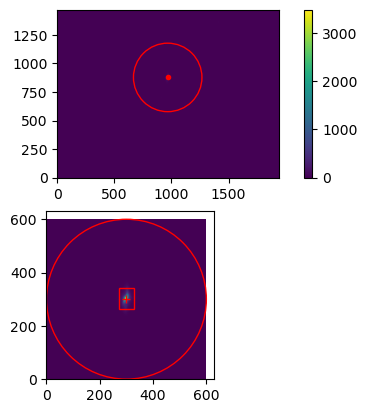

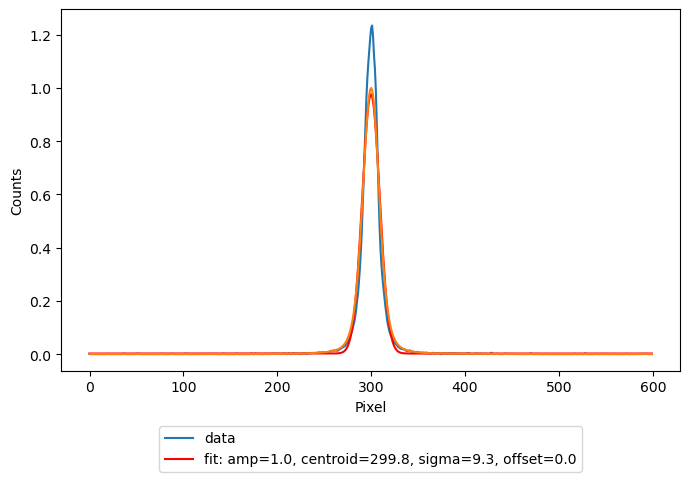

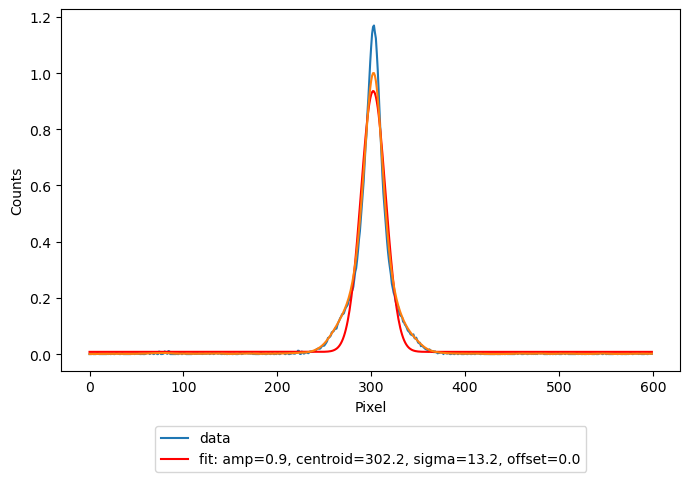

In [11]:
image_diagnostic.test_measurement()

# Imports

In [12]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")
import torch
from xopt import Xopt
from xopt.vocs import VOCS
from xopt.evaluator import Evaluator
import numpy as np
import random

# Evaluator

In [13]:
import time
# define function to measure the total size on OTR4
def eval_beamsize(inputs):
    
    # set pvs and wait for BACT to settle to correct values (validate=True)
    set_magnet_strengths(inputs, pv_objects, validate=True)
    time.sleep(0.5)
    # measure all pvs - except for names in inputs
    results = measure_pvs(
        [name for name in pv_objects.keys() if name not in inputs], pv_objects 
    )

    # do some calculations
    results["time"] = time.time()

    # add beam size measurement to results dict
    beamsize_results = image_diagnostic.measure_beamsize(1)
    results["Sx_mm"] = np.array(beamsize_results["Sx"]) * 1e-3
    results["Sy_mm"] = np.array(beamsize_results["Sy"]) * 1e-3

    #add beam size squared (mm^2)
    results["xrms_sq"] = results["Sx_mm"]**2
    results["yrms_sq"] = results["Sy_mm"]**2
    results = beamsize_results | results
    return results

evaluator = Evaluator(function=eval_beamsize)


In [14]:
eval_beamsize({'QUAD:GUNB:212:1:BCTRL': 0.0016,
 'QUAD:GUNB:212:2:BCTRL': 0.0015,
 'QUAD:GUNB:823:1:BCTRL': 0.0013,
 'QUAD:GUNB:823:2:BCTRL': 0.0019,
 'SOLN:GUNB:212:BCTRL': 0.0441,
 'SOLN:GUNB:823:BCTRL': 0.0259,
     'QUAD:HTR:120:BCTRL':-2.0
    })

QUAD:GUNB:212:1:BCTRL 0.0016
QUAD:GUNB:212:2:BCTRL 0.0015
QUAD:GUNB:823:1:BCTRL 0.0013
QUAD:GUNB:823:2:BCTRL 0.0019
SOLN:GUNB:212:BCTRL 0.0441
SOLN:GUNB:823:BCTRL 0.0259
QUAD:HTR:120:BCTRL -2.0
fitting image


{'Cx': 301.85090213785014,
 'Cy': 294.36927867434923,
 'Sx': 171.28905552828337,
 'Sy': 312.47519360485535,
 'bb_penalty': -238.60028027605583,
 'total_intensity': 474997.1999999999,
 'log10_total_intensity': 5.676691049565639,
 'save_filename': '/home/physics/ml_tuning/20240321_LCLS_II_Injector/OTRS_HTR_330_1711023459.h5',
 'QUAD:HTR:140:BCTRL': 2.01213981773302,
 'QUAD:HTR:300:BCTRL': 1.1807187770838672,
 'QUAD:HTR:320:BCTRL': -2.0934402913247743,
 'ACCL:GUNB:455:PDES': -126.7,
 'ACCL:L0B:0110:ADES': 6.5,
 'ACCL:L0B:0110:PDES': 0.0,
 'ACCL:L0B:0130:PDES': 0.0,
 'time': 1711023459.065721,
 'Sx_mm': 0.17128905552828338,
 'Sy_mm': 0.3124751936048554,
 'xrms_sq': 0.02933994054377135,
 'yrms_sq': 0.09764074661839185}

## VOCS

In [15]:
# create Xopt objects
from xopt import VOCS

IMAGE_CONSTRAINTS = {
            "bb_penalty": ["LESS_THAN", 0.0],
        }

vocs = VOCS(
    variables = {
        'QUAD:HTR:120:BCTRL': [-3.0,-1.0],
        'QUAD:HTR:140:BCTRL': [-4.4778, 4.4762],
         'QUAD:HTR:300:BCTRL': [-4.46035, 4.4692],
         'QUAD:HTR:320:BCTRL': [-4.46919, 4.4792],
    },
    constraints = IMAGE_CONSTRAINTS,
    observables = ["xrms_sq", "yrms_sq"],
)
vocs.variable_names

['QUAD:HTR:120:BCTRL',
 'QUAD:HTR:140:BCTRL',
 'QUAD:HTR:300:BCTRL',
 'QUAD:HTR:320:BCTRL']

# Run Bayesian Exploration on a grid

In [17]:
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from xopt.generators.bayesian.bayesian_exploration import BayesianExplorationGenerator
from xopt.numerical_optimizer import GridOptimizer
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from copy import deepcopy
sys.path.append("../../emitopt/")

meas_dim = 4
tuning_dims = [0,1,2,3,5,6]

covar_module = (MaternKernel(ard_num_dims=len(tuning_dims),
                              active_dims=tuning_dims,
                              lengthscale_prior=None) *
                              PolynomialKernel(power=2, active_dims=[meas_dim])
                 )
scaled_covar_module = ScaleKernel(covar_module)

# prepare options for Xopt generator
covar_module_dict = {
    'xrms_sq': scaled_covar_module,
    "yrms_sq": deepcopy(scaled_covar_module)
}
# covar_module_dict = {}
model_constructor = StandardModelConstructor(
    #covar_modules=covar_module_dict, 
    use_low_noise_prior=False
)

generator = BayesianExplorationGenerator(
    vocs=vocs,
    gp_constructor=model_constructor,
    numerical_optimizer=GridOptimizer(n_grid_points=10),
    n_interpolate_points=5
)

from xopt import Xopt
X_bayes_exp = Xopt(
    vocs=vocs,
    generator=generator,
    evaluator=evaluator,
    strict=True,
    dump_file = "bayes_exp_matching_optimized_upstream.yml"
)

## sample in local area around reference point

In [23]:
from epics import caget_many
from xopt.utils import get_local_region

#reset_pvs()
current_value = dict(
    zip(
        X_bayes_exp.vocs.variable_names,
        caget_many(X_bayes_exp.vocs.variable_names)
    )
)
print(current_value)


random_sample_region = get_local_region(current_value,X_bayes_exp.vocs, fraction=0.1)
X_bayes_exp.random_evaluate(10, custom_bounds=random_sample_region)

{'QUAD:HTR:120:BCTRL': -2.081426387954764, 'QUAD:HTR:140:BCTRL': 1.7469062178911847, 'QUAD:HTR:300:BCTRL': 0.5660485387077501, 'QUAD:HTR:320:BCTRL': -1.314348321958475}
QUAD:HTR:120:BCTRL -2.1271765774066527
QUAD:HTR:140:BCTRL 1.3381618797463393
QUAD:HTR:300:BCTRL -0.29566413154420423
QUAD:HTR:320:BCTRL -1.684093427581003
fitting image
QUAD:HTR:120:BCTRL -2.263147163948308
QUAD:HTR:140:BCTRL 2.4098745871833596
QUAD:HTR:300:BCTRL 1.3007395905803987
QUAD:HTR:320:BCTRL -2.124760081446083
fitting image
QUAD:HTR:120:BCTRL -2.2335098330477257
QUAD:HTR:140:BCTRL 1.1240952888539308
QUAD:HTR:300:BCTRL -0.09074659123004078
QUAD:HTR:320:BCTRL -0.9047337772363224
fitting image
QUAD:HTR:120:BCTRL -2.1089211383416626
QUAD:HTR:140:BCTRL 2.004230232369027
QUAD:HTR:300:BCTRL 0.7839287119309173
QUAD:HTR:320:BCTRL -1.8517538977847021
fitting image
QUAD:HTR:120:BCTRL -2.1014252367689323
QUAD:HTR:140:BCTRL 1.0376128440443297
QUAD:HTR:300:BCTRL 1.2852967747332873
QUAD:HTR:320:BCTRL -0.8697378387910313
fitti

,QUAD:HTR:120:BCTRL,QUAD:HTR:140:BCTRL,QUAD:HTR:300:BCTRL,QUAD:HTR:320:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,...,ACCL:L0B:0110:ADES,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,time,Sx_mm,Sy_mm,xrms_sq,yrms_sq,xopt_runtime,xopt_error
0,-2.127177,1.338162,-0.295664,-1.684093,286.279755,298.558073,344.979934,245.397237,-221.678202,393456.0,...,6.5,0.0,0.0,1.711024e+09,0.344980,0.245397,0.119011,0.060220,13.030395,False
1,-2.263147,2.409875,1.300740,-2.124760,307.699716,299.703170,162.849284,304.970420,-241.822292,436937.6,...,6.5,0.0,0.0,1.711024e+09,0.162849,0.304970,0.026520,0.093007,4.820981,False
2,-2.233510,1.124095,-0.090747,-0.904734,285.984190,296.268284,327.141907,271.529785,-220.308348,400650.6,...,6.5,0.0,0.0,1.711024e+09,0.327142,0.271530,0.107022,0.073728,14.097398,False
3,-2.108921,2.004230,0.783929,-1.851754,302.289929,296.659381,175.128741,279.882135,-244.473269,415924.6,...,6.5,0.0,0.0,1.711024e+09,0.175129,0.279882,0.030670,0.078334,3.853134,False
4,-2.101425,1.037613,1.285297,-0.869738,290.887333,288.955640,263.597008,325.479712,-220.375540,390067.6,...,6.5,0.0,0.0,1.711024e+09,0.263597,0.325480,0.069483,0.105937,4.019305,False
5,-1.966689,0.982006,1.302189,-1.522129,288.716813,284.975715,270.899015,424.577060,-202.724734,390111.2,...,6.5,0.0,0.0,1.711024e+09,0.270899,0.424577,0.073386,0.180266,2.999119,False
6,-1.967360,2.210672,0.912919,-2.057373,306.307575,296.929201,164.133655,325.127283,-237.482512,403138.8,...,6.5,0.0,0.0,1.711024e+09,0.164134,0.325127,0.026940,0.105708,3.981534,False
7,-2.119283,1.987182,1.331932,-1.495407,301.253170,291.573983,155.440170,299.273024,-239.298421,408089.6,...,6.5,0.0,0.0,1.711024e+09,0.155440,0.299273,0.024162,0.089564,3.072073,False
8,-2.046135,2.024946,0.770964,-1.194728,301.950226,293.504086,150.187727,289.527008,-242.464914,410543.8,...,6.5,0.0,0.0,1.711024e+09,0.150188,0.289527,0.022556,0.083826,2.972433,False
9,-1.965620,1.126284,1.263595,-1.900730,291.901473,285.685588,274.473845,284.181260,-222.364101,376060.4,...,6.5,0.0,0.0,1.711024e+09,0.274474,0.284181,0.075336,0.080759,3.938661,False


In [25]:
import time
start = time.time()
for i in range(20):
    X_bayes_exp.step()
print(time.time() - start)

QUAD:HTR:120:BCTRL -2.9999899864196777
QUAD:HTR:140:BCTRL 2.8843714714050295
QUAD:HTR:300:BCTRL -4.063471984863281
QUAD:HTR:320:BCTRL 4.479189872741699
fitting image
QUAD:HTR:120:BCTRL -2.9999899864196777
QUAD:HTR:140:BCTRL 3.2823261260986327
QUAD:HTR:300:BCTRL -3.666603946685791
QUAD:HTR:320:BCTRL 4.479189872741699
fitting image
QUAD:HTR:120:BCTRL -2.9999899864196777
QUAD:HTR:140:BCTRL 3.6802807807922364
QUAD:HTR:300:BCTRL -3.2697359085083004
QUAD:HTR:320:BCTRL 4.479189872741699
fitting image
QUAD:HTR:120:BCTRL -2.9999899864196777
QUAD:HTR:140:BCTRL 4.07823543548584
QUAD:HTR:300:BCTRL -2.8728678703308104
QUAD:HTR:320:BCTRL 4.479189872741699
fitting image
QUAD:HTR:120:BCTRL -2.9999899864196777
QUAD:HTR:140:BCTRL 4.476190090179443
QUAD:HTR:300:BCTRL -2.4759998321533203
QUAD:HTR:320:BCTRL 4.479189872741699
fitting image
QUAD:HTR:120:BCTRL -2.5999939918518065
QUAD:HTR:140:BCTRL 3.481303405761719
QUAD:HTR:300:BCTRL -1.6822638511657715
QUAD:HTR:320:BCTRL 2.6895158767700194
fitting image
QUA

KeyboardInterrupt: 